In [ ]:
import tellurium as te
print("Tellurium imported OK!", te.__version__)


Matplotlib is building the font cache; this may take a moment.


Tellurium imported OK! 2.2.11.2


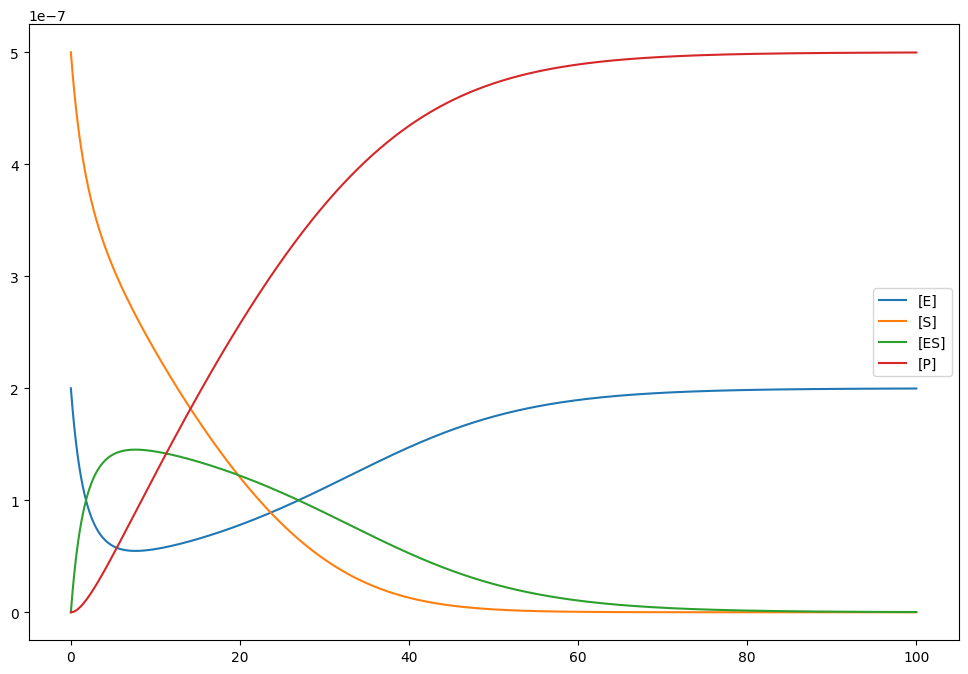

In [ ]:
# plotting utility from Tellurium documentation
def my_plot(r, result, sizeX=6, sizeY=4):

    import pylab as p

    if result is None:
        raise Exception("no simulation result")

    # assume result is a standard numpy array

    selections = r.timeCourseSelections

    if len(result.shape) != 2 or result.shape[1] != len(selections):
        raise Exception("simulation result columns not equal to number of selections,"
                        "likely a simulation has not been run")

    times = result[:,0]

    p.figure(figsize=(sizeX, sizeY))
    
    for i in range(1, len(selections)):
        series = result[:,i]
        name = selections[i]
        p.plot(times, series, label=str(name))
        
    p.legend()
 
    p.show()


import tellurium as te

MM = '''
model Michaelis_Menten
  
  // Species initializations:
  E  = 2e-7;
  S  = 5e-7;
  ES = 0;
  P  = 0;
  
  // Reactions:
  E + S -> ES;     (k1 * E * S);
  ES    -> E + S;  (k1r * ES);
  ES    -> E + P;  (k2 * ES);

  // Variable initialization:
  k1  = 1e6; 
  k1r = 1e-4; 
  k2  = 0.1;
end'''

r = te.loada(MM)
result = r.simulate(0, 100, 1000)

# plot the simulation output 
#r.plot()
my_plot(r, result, sizeX=12, sizeY=8)

# export to SBML
r.exportToSBML('MMant.xml', current = False)





# Q1. Antimony model with reactions 1 to 3.

1. R5P --(RibA)--> D2B4P  
2. D2B4P --(RibH)--> D8RL  
3. D8RL --(RibE)--> Riboflavin  




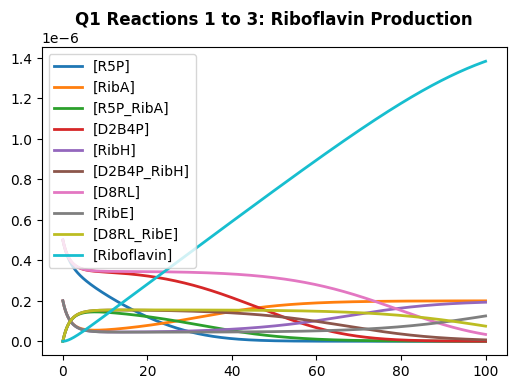

In [ ]:
import tellurium as te

q1_model = """
model Q1()

  // Species
  R5P = 5e-7;
  RibA = 2e-7;
  R5P_RibA = 0;

  D2B4P = 5e-7;
  RibH = 2e-7;
  D2B4P_RibH = 0;

  D8RL = 5e-7;
  RibE = 2e-7;
  D8RL_RibE = 0;

  Riboflavin = 0;

  // Parameters
  k1 = 1e6;
  k1r = 1e-4;
  k2 = 0.1;

   //  Reaction 1
  bind_R5P_RibA:     R5P + RibA   -> R5P_RibA;       k1  * R5P * RibA;
  unbind_R5P_RibA:   R5P_RibA     -> R5P + RibA;     k1r * R5P_RibA;
  make_D2B4P:        R5P_RibA     -> D2B4P + RibA;   k2  * R5P_RibA;

  //  Reaction 2
  bind_D2B4P_RibH:   D2B4P + RibH -> D2B4P_RibH; k1  * D2B4P * RibH;
  unbind_D2B4P_RibH: D2B4P_RibH   -> D2B4P + RibH;   k1r * D2B4P_RibH;
  make_D8RL:         D2B4P_RibH   -> D8RL + RibH;    k2  * D2B4P_RibH;

  // Reaction 3:
  bind_D8RL_RibE:    D8RL + RibE  -> D8RL_RibE;      k1  * D8RL * RibE;
  unbind_D8RL_RibE:  D8RL_RibE    -> D8RL + RibE;    k1r * D8RL_RibE;
  make_Riboflavin:   D8RL_RibE    -> Riboflavin + RibE;  k2 * D8RL_RibE;


end
"""

r = te.loada(q1_model)
result = r.simulate(0, 100, 1000)
r.plot(title="Q1 Reactions 1 to 3: Riboflavin Production")


# Q2. Antimony model with reactions 1 to 5.

R5P --(RibA)--> D2B4P  
D2B4P --(RibH)--> D8RL  
D8RL --(RibE)--> Riboflavin  
Riboflavin --(RibC)--> FMN  
FMN --(RibC)--> FAD  



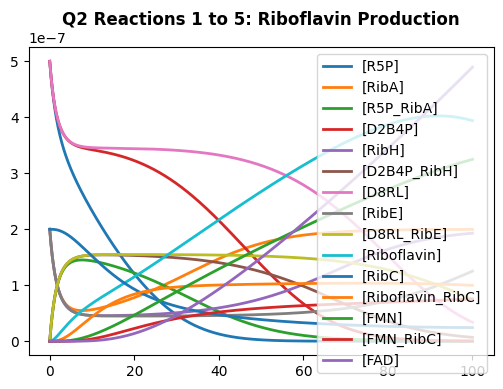

In [ ]:
import tellurium as te

q2_model = """
model Q2()

  // Species
  R5P = 5e-7;
  RibA = 2e-7;
  R5P_RibA = 0;

  D2B4P = 5e-7;
  RibH = 2e-7;
  D2B4P_RibH = 0;

  D8RL = 5e-7;
  RibE = 2e-7;
  D8RL_RibE = 0;

  Riboflavin = 0;

  RibC = 2e-7;
  Riboflavin_RibC = 0;

  FMN = 0;
  FMN_RibC = 0;
  FAD = 0;

  // Parameters 
  k1 = 1e6;
  k1r = 1e-4;
  k2 = 0.1;

  //  Reaction 1
  bind_R5P_RibA:     R5P + RibA   -> R5P_RibA;       k1  * R5P * RibA;
  unbind_R5P_RibA:   R5P_RibA     -> R5P + RibA;     k1r * R5P_RibA;
  make_D2B4P:        R5P_RibA     -> D2B4P + RibA;   k2  * R5P_RibA;

  //  Reaction 2
  bind_D2B4P_RibH:   D2B4P + RibH -> D2B4P_RibH; k1  * D2B4P * RibH;
  unbind_D2B4P_RibH: D2B4P_RibH   -> D2B4P + RibH;   k1r * D2B4P_RibH;
  make_D8RL:         D2B4P_RibH   -> D8RL + RibH;    k2  * D2B4P_RibH;

  // Reaction 3:
  bind_D8RL_RibE:    D8RL + RibE  -> D8RL_RibE;      k1  * D8RL * RibE;
  unbind_D8RL_RibE:  D8RL_RibE    -> D8RL + RibE;    k1r * D8RL_RibE;
  make_Riboflavin:   D8RL_RibE    -> Riboflavin + RibE;  k2 * D8RL_RibE;

  //  Reaction 4:
  bind_Riboflavin_RibC:     Riboflavin + RibC  -> Riboflavin_RibC;   k1  * Riboflavin * RibC;
  unbind_Riboflavin_RibC:   Riboflavin_RibC    -> Riboflavin + RibC; k1r * Riboflavin_RibC;
  make_FMN:                 Riboflavin_RibC    -> FMN + RibC;        k2  * Riboflavin_RibC;

  //  Reaction 5
  bind_FMN_RibC:            FMN + RibC  -> FMN_RibC;                 k1  * FMN * RibC;
  unbind_FMN_RibC:          FMN_RibC    -> FMN + RibC;               k1r * FMN_RibC;
  make_FAD:                 FMN_RibC    -> FAD + RibC;               k2  * FMN_RibC;

end
"""

# Load and simulate
r2 = te.loada(q2_model)
result2 = r2.simulate(0, 100, 1000)
r2.plot(title="Q2 Reactions 1 to 5: Riboflavin Production")


# Q3,4. Model Extension and SBML export

Based on the riboflavin biosynthesis pathway in *Bacillus subtilis*, the model was extended to include **gluconate-6-phosphate**, an upstream metabolite from the pentose phosphate pathway. This reaction represents the contribution of the pentose phosphate pathway to riboflavin biosynthesis. Furthermore, the model was exported to SBML.




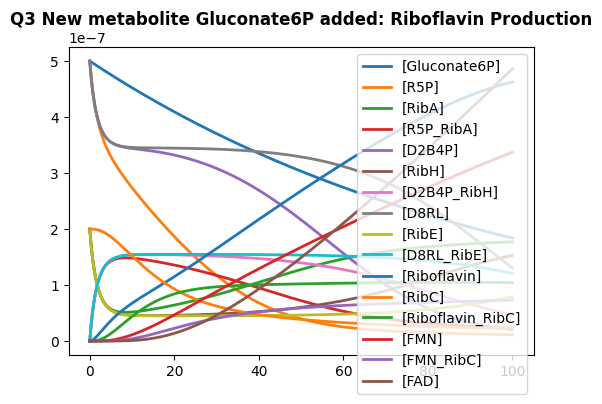

In [ ]:
import tellurium as te

q3_model = """
model Q3()

  // Species
  Gluconate6P = 5e-7;   // New added metabolite

  R5P = 5e-7;
  RibA = 2e-7;
  R5P_RibA = 0;

  D2B4P = 5e-7;
  RibH = 2e-7;
  D2B4P_RibH = 0;

  D8RL = 5e-7;
  RibE = 2e-7;
  D8RL_RibE = 0;

  Riboflavin = 0;

  RibC = 2e-7;
  Riboflavin_RibC = 0;

  FMN = 0;
  FMN_RibC = 0;
  FAD = 0;

  // Parameters
  k1 = 1e6;
  k1r = 1e-4;
  k2 = 0.1;

  k_g6p_to_r5p = 0.01;   // New parameter added

  // New Reaction 1

  convert_R5P_from_Gluconate6P: Gluconate6P -> R5P;  k_g6p_to_r5p * Gluconate6P;

  // Reaction 2
  bind_R5P_RibA:     R5P + RibA   -> R5P_RibA;       k1  * R5P * RibA;
  unbind_R5P_RibA:   R5P_RibA     -> R5P + RibA;     k1r * R5P_RibA;
  make_D2B4P:        R5P_RibA     -> D2B4P + RibA;   k2  * R5P_RibA;

  // Reaction 3
  bind_D2B4P_RibH:   D2B4P + RibH -> D2B4P_RibH;     k1  * D2B4P * RibH;
  unbind_D2B4P_RibH: D2B4P_RibH   -> D2B4P + RibH;   k1r * D2B4P_RibH;
  make_D8RL:         D2B4P_RibH   -> D8RL + RibH;    k2  * D2B4P_RibH;

  // Reaction 4
  bind_D8RL_RibE:    D8RL + RibE  -> D8RL_RibE;      k1  * D8RL * RibE;
  unbind_D8RL_RibE:  D8RL_RibE    -> D8RL + RibE;    k1r * D8RL_RibE;
  make_Riboflavin:   D8RL_RibE    -> Riboflavin + RibE;  k2 * D8RL_RibE;

  // Reaction 5
  bind_Riboflavin_RibC:     Riboflavin + RibC  -> Riboflavin_RibC;   k1  * Riboflavin * RibC;
  unbind_Riboflavin_RibC:   Riboflavin_RibC    -> Riboflavin + RibC; k1r * Riboflavin_RibC;
  make_FMN:                 Riboflavin_RibC    -> FMN + RibC;        k2  * Riboflavin_RibC;

  // Reaction 6
  bind_FMN_RibC:            FMN + RibC  -> FMN_RibC;                 k1  * FMN * RibC;
  unbind_FMN_RibC:          FMN_RibC    -> FMN + RibC;               k1r * FMN_RibC;
  make_FAD:                 FMN_RibC    -> FAD + RibC;               k2  * FMN_RibC;

end
"""

r3 = te.loada(q3_model)
result3 = r3.simulate(0, 100, 1000)
r3.plot(title="Q3 New metabolite Gluconate6P added: Riboflavin Production")

#Exporting to SBML
r3.exportToSBML('New_metabolite_riboflavin_gluconate.xml', current = False)


# Adding a biomass reaction and introducing one synthesis reaction

This introduces a biomass reaction and a synthesis reaction for a substrate further exported into SBML file for flux balance analysis.

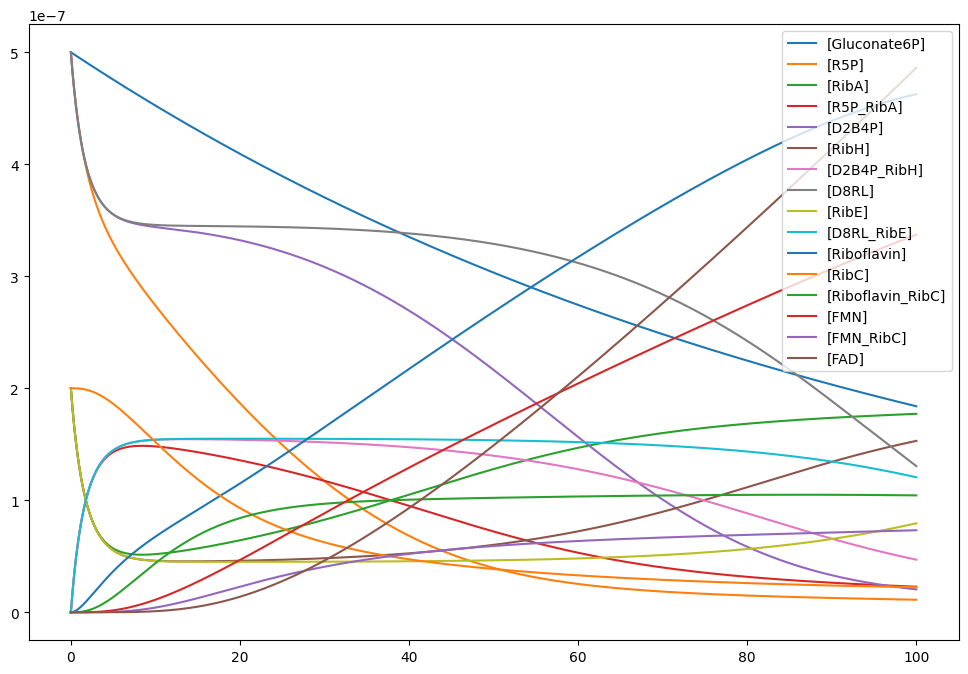

Exported: Q3_for_FBA.xml


In [ ]:
"""
Q3 model prepared for FBA in OptFlux (MMforFBA-style)
Adds:
  1) Substrate synthesis (source) reaction
  2) Biomass (sink) reaction consuming ONLY riboflavin
  3) Optional sinks for FMN/FAD to avoid dead-ends in FBA
"""

import tellurium as te

# plotting utility from Tellurium documentation (same style as MMforFBA.py)
def my_plot(r, result, sizeX=10, sizeY=6):
    import pylab as p
    selections = r.timeCourseSelections
    times = result[:, 0]
    p.figure(figsize=(sizeX, sizeY))
    for i in range(1, len(selections)):
        p.plot(times, result[:, i], label=str(selections[i]))
    p.legend()
    p.show()

Q3 = r'''
model Q3_for_FBA


  // Species initializations:

  Gluconate6P = 5e-7;
  R5P         = 5e-7;

  RibA     = 2e-7;
  R5P_RibA = 0;

  D2B4P       = 5e-7;
  RibH        = 2e-7;
  D2B4P_RibH  = 0;

  D8RL       = 5e-7;
  RibE       = 2e-7;
  D8RL_RibE  = 0;

  Riboflavin = 0;

  RibC             = 2e-7;
  Riboflavin_RibC  = 0;

  FMN      = 0;
  FMN_RibC = 0;

  FAD = 0;


  // NEW: FBA-style source + biomass sink (MMforFBA template)
 
  // Substrate synthesis / uptake (source)
  EX_G6P:       -> Gluconate6P;     (k_s);

  // Biomass reaction that ONLY consumes riboflavin (sink)
  BIOMASS_RIB:  Riboflavin -> ;     (k_d * Riboflavin);

  // Optional: sinks to avoid FMN/FAD dead-ends in steady-state FBA
  EX_FMN:       FMN -> ;            (k_fmn_out * FMN);
  EX_FAD:       FAD -> ;            (k_fad_out * FAD);


  // Pathway connection (added metabolite)
 
  convert_R5P_from_Gluconate6P: Gluconate6P -> R5P; (k_g6p_to_r5p * Gluconate6P);


  // Riboflavin pathway steps (enzyme-like)
  bind_R5P_RibA:     R5P + RibA   -> R5P_RibA;       (k1  * R5P * RibA);
  unbind_R5P_RibA:   R5P_RibA     -> R5P + RibA;     (k1r * R5P_RibA);
  make_D2B4P:        R5P_RibA     -> D2B4P + RibA;   (k2  * R5P_RibA);

  bind_D2B4P_RibH:   D2B4P + RibH -> D2B4P_RibH;     (k1  * D2B4P * RibH);
  unbind_D2B4P_RibH: D2B4P_RibH   -> D2B4P + RibH;   (k1r * D2B4P_RibH);
  make_D8RL:         D2B4P_RibH   -> D8RL + RibH;    (k2  * D2B4P_RibH);

  bind_D8RL_RibE:    D8RL + RibE  -> D8RL_RibE;      (k1  * D8RL * RibE);
  unbind_D8RL_RibE:  D8RL_RibE    -> D8RL + RibE;    (k1r * D8RL_RibE);
  make_Riboflavin:   D8RL_RibE    -> Riboflavin + RibE; (k2 * D8RL_RibE);

  bind_Riboflavin_RibC:     Riboflavin + RibC  -> Riboflavin_RibC;   (k1  * Riboflavin * RibC);
  unbind_Riboflavin_RibC:   Riboflavin_RibC    -> Riboflavin + RibC; (k1r * Riboflavin_RibC);
  make_FMN:                 Riboflavin_RibC    -> FMN + RibC;        (k2  * Riboflavin_RibC);

  bind_FMN_RibC:            FMN + RibC  -> FMN_RibC;                 (k1  * FMN * RibC);
  unbind_FMN_RibC:          FMN_RibC    -> FMN + RibC;               (k1r * FMN_RibC);
  make_FAD:                 FMN_RibC    -> FAD + RibC;               (k2  * FMN_RibC);

 
  // Parameters (set to 0 so OptFlux bounds control them)

  k1  = 1e6;
  k1r = 1e-4;
  k2  = 0.1;

  k_g6p_to_r5p = 0.01;

  // These are like MMforFBA.py: start at 0, then OptFlux bounds control flux
  k_s = 0;          // source strength (OptFlux: bounds on EX_G6P)
  k_d = 0;          // biomass demand strength (OptFlux: bounds on BIOMASS_RIB)

  k_fmn_out = 0;    // OptFlux bounds on EX_FMN
  k_fad_out = 0;    // OptFlux bounds on EX_FAD

end
'''

r = te.loada(Q3)

# Optional simulation (just to ensure the model runs)
result = r.simulate(0, 100, 1000)
my_plot(r, result, sizeX=12, sizeY=8)

# Export to SBML for OptFlux
r.exportToSBML('Q3_for_FBA.xml', current=False)
print("Exported: Q3_for_FBA.xml")
